In [41]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.impute import SimpleImputer
from genotype_encoder import hw_encoder, encode_one_hot, simple_encoder
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import pickle

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
MISSING_VAL_ACCEPTANCE_RATIO = 0.20
MIN_MINOR_ALLELE_FREQ = 0.05

In [3]:
phenotypes = pd.read_csv('../Dataset/FHB_Traits_ALL.txt', delimiter = '\t')
phenotypes.head(4)

,Taxa,HD50,HT,FHB,SB2,DON,DONLT,Unnamed: 7,Unnamed: 8
0,G1,62.0,76.0,3.2,7.5,20.2,1.2,NaN,NaN
1,G2,62.5,74.5,3.0,7.0,16.5,1.1,NaN,NaN
2,G3,63.3,77.8,2.1,7.5,15.5,1.1,NaN,NaN
3,G4,58.9,67.8,3.0,6.3,25.1,1.3,NaN,NaN


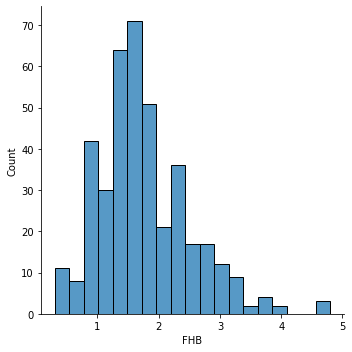

In [4]:
sns.displot(phenotypes, x = 'FHB')

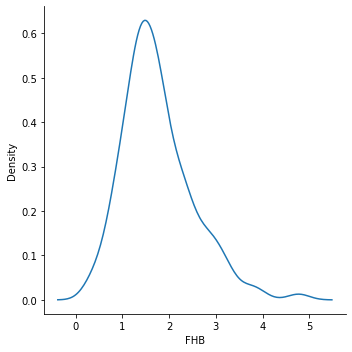

In [5]:
sns.displot(phenotypes, x = 'FHB', kind = 'kde')

In [6]:
phenotypes['CAT_FHB'] = phenotypes.FHB.apply(lambda x: 1 if x <= 1 else (2 if x <= 2 else 3) )
phenotypes.head(5)

,Taxa,HD50,HT,FHB,SB2,DON,DONLT,Unnamed: 7,Unnamed: 8,CAT_FHB
0,G1,62.0,76.0,3.2,7.5,20.2,1.2,NaN,NaN,3
1,G2,62.5,74.5,3.0,7.0,16.5,1.1,NaN,NaN,3
2,G3,63.3,77.8,2.1,7.5,15.5,1.1,NaN,NaN,3
3,G4,58.9,67.8,3.0,6.3,25.1,1.3,NaN,NaN,3
4,G5,61.9,75.8,3.0,7.8,14.2,1.1,NaN,NaN,3


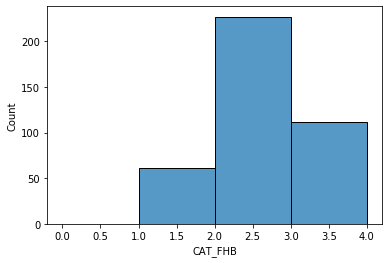

In [7]:
sns.histplot(data=phenotypes, x ='CAT_FHB', bins = [0,1, 2, 3, 4])

In [8]:
germplasm = pd.read_csv('../Dataset/Genotype-Tucker2.txt', delimiter = '\t', index_col='Name')
germplasm.head(5)

,Index,Address,GenTrain Score,Frac A,Frac C,Frac G,Frac T,G1,G2,G3,...,G391,G392,G393,G394,G395,G396,G397,G398,G399,G400
Name,,,,,,,,,,,,,,,,,,,,,
BK_01,1,75781258,0.270494,0.248521,0.295858,0.248521,0.207101,NC,NC,NC,...,BB,AB,BB,BB,AB,BB,AB,BB,AB,AB
BK_03,2,6656338,0.716519,0.330435,0.121739,0.226087,0.321739,AA,AA,AA,...,AA,NC,NC,BB,AA,AA,NC,BB,NC,AA
BK_04,3,1747980,0.607074,0.146067,0.292135,0.292135,0.269663,BB,BB,BB,...,BB,BB,BB,AA,BB,BB,BB,BB,BB,BB
BK_05,4,53738907,0.623964,0.142857,0.304348,0.279503,0.273292,BB,BB,BB,...,AA,BB,AA,AA,AA,AA,AA,BB,AA,BB
BK_07,5,38671159,0.000000,0.231482,0.185185,0.268518,0.314815,NC,NC,NC,...,AB,BB,BB,AB,BB,AB,BB,AB,BB,AB


In [9]:
germplasm = germplasm.loc[:, 'G1': 'G400']
germplasm.head(5)

,G1,G2,G3,G4,G5,G6,G7,G8,G9,G10,...,G391,G392,G393,G394,G395,G396,G397,G398,G399,G400
Name,,,,,,,,,,,,,,,,,,,,,
BK_01,NC,NC,NC,NC,NC,NC,NC,NC,NC,NC,...,BB,AB,BB,BB,AB,BB,AB,BB,AB,AB
BK_03,AA,AA,AA,AA,AA,AA,AA,AA,AA,AA,...,AA,NC,NC,BB,AA,AA,NC,BB,NC,AA
BK_04,BB,BB,BB,BB,BB,BB,BB,BB,BB,BB,...,BB,BB,BB,AA,BB,BB,BB,BB,BB,BB
BK_05,BB,BB,BB,AA,BB,BB,BB,AA,AA,BB,...,AA,BB,AA,AA,AA,AA,AA,BB,AA,BB
BK_07,NC,NC,NC,NC,NC,NC,NC,NC,NC,NC,...,AB,BB,BB,AB,BB,AB,BB,AB,BB,AB


In [10]:
germplasm = germplasm.T
germplasm.head(5)

Name,BK_01,BK_03,BK_04,BK_05,BK_07,BK_08,BK_09,BK_10,BK_11,BK_12,...,SCRI_RS_98343,SCRI_RS_98443,SCRI_RS_98829,SCRI_RS_99344,SCRI_RS_994,SCRI_RS_99798,SCRI_RS_9980,SCRI_RS_99836,SCRI_RS_9991,SCRI_RS_99965
G1,NC,AA,BB,BB,NC,AA,AA,BB,BB,AA,...,BB,AA,BB,AA,BB,BB,AA,BB,AA,NC
G2,NC,AA,BB,BB,NC,AA,AA,BB,BB,AA,...,AA,AA,BB,AA,BB,BB,AA,BB,AA,NC
G3,NC,AA,BB,BB,NC,AA,AA,BB,BB,AA,...,BB,AA,BB,AA,BB,BB,AA,BB,AA,NC
G4,NC,AA,BB,AA,NC,BB,AA,BB,BB,AA,...,AA,BB,BB,AA,BB,BB,AA,BB,AA,NC
G5,NC,AA,BB,BB,NC,BB,AA,BB,BB,AA,...,AA,BB,BB,AA,BB,BB,AA,BB,AA,NC


In [11]:
def removeMissingValueMoreThanN(germplasm, percentage):
    #germplasm - a dataframe array
    counts = germplasm == 'NC'
    counts = counts.sum() / len(germplasm) 
    ind = counts < percentage

    germplasm = germplasm.loc[:, ind]
    
    return germplasm

In [12]:
def removeMinorAlleleLessThanN(germplasm, percentage):
    count_homo_1 = germplasm == 'AA'
    count_hetero = germplasm == 'AB'
    count_homo_1 = count_homo_1.sum()
    count_hetero = count_hetero.sum()
    
    allele_1_freq = (2 * count_homo_1 + count_hetero) / (2 * len(germplasm))
    
    ind_to_remove = (allele_1_freq < (1-percentage)) & (allele_1_freq > percentage)
    
    germplasm = germplasm.loc[:, ind_to_remove]
    
    return germplasm
    

In [13]:
germplasm = removeMissingValueMoreThanN(germplasm, MISSING_VAL_ACCEPTANCE_RATIO)
germplasm.head(5)

Name,BK_04,BK_05,BK_08,BK_09,BK_10,BK_11,BK_12,BK_13,BK_14,BK_19,...,SCRI_RS_98293,SCRI_RS_98343,SCRI_RS_98443,SCRI_RS_98829,SCRI_RS_99344,SCRI_RS_994,SCRI_RS_99798,SCRI_RS_9980,SCRI_RS_99836,SCRI_RS_9991
G1,BB,BB,AA,AA,BB,BB,AA,BB,AA,BB,...,AA,BB,AA,BB,AA,BB,BB,AA,BB,AA
G2,BB,BB,AA,AA,BB,BB,AA,BB,AA,BB,...,BB,AA,AA,BB,AA,BB,BB,AA,BB,AA
G3,BB,BB,AA,AA,BB,BB,AA,BB,AA,BB,...,AA,BB,AA,BB,AA,BB,BB,AA,BB,AA
G4,BB,AA,BB,AA,BB,BB,AA,BB,AA,BB,...,AA,AA,BB,BB,AA,BB,BB,AA,BB,AA
G5,BB,BB,BB,AA,BB,BB,AA,BB,AA,BB,...,AA,AA,BB,BB,AA,BB,BB,AA,BB,AA


In [14]:
germplasm = germplasm.replace('NC', np.nan)
germplasm.head(5)

Name,BK_04,BK_05,BK_08,BK_09,BK_10,BK_11,BK_12,BK_13,BK_14,BK_19,...,SCRI_RS_98293,SCRI_RS_98343,SCRI_RS_98443,SCRI_RS_98829,SCRI_RS_99344,SCRI_RS_994,SCRI_RS_99798,SCRI_RS_9980,SCRI_RS_99836,SCRI_RS_9991
G1,BB,BB,AA,AA,BB,BB,AA,BB,AA,BB,...,AA,BB,AA,BB,AA,BB,BB,AA,BB,AA
G2,BB,BB,AA,AA,BB,BB,AA,BB,AA,BB,...,BB,AA,AA,BB,AA,BB,BB,AA,BB,AA
G3,BB,BB,AA,AA,BB,BB,AA,BB,AA,BB,...,AA,BB,AA,BB,AA,BB,BB,AA,BB,AA
G4,BB,AA,BB,AA,BB,BB,AA,BB,AA,BB,...,AA,AA,BB,BB,AA,BB,BB,AA,BB,AA
G5,BB,BB,BB,AA,BB,BB,AA,BB,AA,BB,...,AA,AA,BB,BB,AA,BB,BB,AA,BB,AA


In [15]:
germplasm = germplasm.fillna(germplasm.mode().iloc[0])
germplasm.head(5)

Name,BK_04,BK_05,BK_08,BK_09,BK_10,BK_11,BK_12,BK_13,BK_14,BK_19,...,SCRI_RS_98293,SCRI_RS_98343,SCRI_RS_98443,SCRI_RS_98829,SCRI_RS_99344,SCRI_RS_994,SCRI_RS_99798,SCRI_RS_9980,SCRI_RS_99836,SCRI_RS_9991
G1,BB,BB,AA,AA,BB,BB,AA,BB,AA,BB,...,AA,BB,AA,BB,AA,BB,BB,AA,BB,AA
G2,BB,BB,AA,AA,BB,BB,AA,BB,AA,BB,...,BB,AA,AA,BB,AA,BB,BB,AA,BB,AA
G3,BB,BB,AA,AA,BB,BB,AA,BB,AA,BB,...,AA,BB,AA,BB,AA,BB,BB,AA,BB,AA
G4,BB,AA,BB,AA,BB,BB,AA,BB,AA,BB,...,AA,AA,BB,BB,AA,BB,BB,AA,BB,AA
G5,BB,BB,BB,AA,BB,BB,AA,BB,AA,BB,...,AA,AA,BB,BB,AA,BB,BB,AA,BB,AA


In [16]:
germplasm = removeMinorAlleleLessThanN(germplasm, MIN_MINOR_ALLELE_FREQ)
germplasm.head(5)

Name,BK_05,BK_08,BK_12,BK_13,BK_14,BOPA1_10012-1239,BOPA1_1007-651,BOPA1_10126-999,BOPA1_10207-1024,BOPA1_10248-954,...,SCRI_RS_97418,SCRI_RS_98248,SCRI_RS_98293,SCRI_RS_98343,SCRI_RS_98443,SCRI_RS_99344,SCRI_RS_994,SCRI_RS_99798,SCRI_RS_9980,SCRI_RS_9991
G1,BB,AA,AA,BB,AA,AA,AA,BB,AA,BB,...,AA,AA,AA,BB,AA,AA,BB,BB,AA,AA
G2,BB,AA,AA,BB,AA,AA,AA,BB,BB,BB,...,AA,AA,BB,AA,AA,AA,BB,BB,AA,AA
G3,BB,AA,AA,BB,AA,AA,AA,BB,AA,BB,...,AA,AA,AA,BB,AA,AA,BB,BB,AA,AA
G4,AA,BB,AA,BB,AA,AA,AA,BB,AA,BB,...,AA,AA,AA,AA,BB,AA,BB,BB,AA,AA
G5,BB,BB,AA,BB,AA,AA,AA,BB,AA,BB,...,AA,AA,AA,AA,BB,AA,BB,BB,AA,AA


In [17]:
tr_germplasm, test_germplasm, tr_fhb, test_fhb = train_test_split(germplasm, phenotypes['CAT_FHB'], test_size = 0.1, random_state = 42, stratify = phenotypes['CAT_FHB'])
tr_germplasm, vali_germplasm, tr_fhb, vali_fhb = train_test_split(tr_germplasm, tr_fhb, test_size = 0.1, random_state = 42, stratify = tr_fhb)
print('training germplasm: ', tr_germplasm.shape)
print('test germplasm: ', test_germplasm.shape)
print('validation germplasm: ', vali_germplasm.shape)

training germplasm:  (324, 24866)
test germplasm:  (40, 24866)
validation germplasm:  (36, 24866)


In [18]:
tr_germplasm.head(5)

Name,BK_05,BK_08,BK_12,BK_13,BK_14,BOPA1_10012-1239,BOPA1_1007-651,BOPA1_10126-999,BOPA1_10207-1024,BOPA1_10248-954,...,SCRI_RS_97418,SCRI_RS_98248,SCRI_RS_98293,SCRI_RS_98343,SCRI_RS_98443,SCRI_RS_99344,SCRI_RS_994,SCRI_RS_99798,SCRI_RS_9980,SCRI_RS_9991
G49,BB,AA,AA,BB,AA,AA,BB,AA,BB,BB,...,AA,BB,BB,AA,BB,BB,BB,BB,AA,BB
G340,AA,AA,AA,BB,AA,AA,AA,BB,AA,BB,...,AA,AA,BB,AA,AA,AA,BB,BB,AA,AA
G161,AA,AA,AB,AB,AB,AA,AB,AB,AB,BB,...,AB,BB,BB,AA,AA,BB,BB,BB,AA,BB
G175,AA,AA,AA,BB,AA,AA,BB,BB,AA,BB,...,AA,BB,BB,AA,AA,BB,BB,BB,AA,AA
G215,BB,BB,AA,BB,AA,BB,AA,AA,AA,AA,...,AA,BB,BB,AA,BB,BB,AA,AA,AA,AA


In [19]:
hw = hw_encoder('AA', 'BB', 'AB')
germplasm_partial = tr_germplasm.iloc[0:5,0:5].copy(deep = True)
germplasm_hardy = hw.fit_transform(germplasm_partial)
germplasm_hardy.head()

Name,BK_05,BK_08,BK_12,BK_13,BK_14
G49,0.16,0.64,0.81,0.81,0.81
G340,0.36,0.64,0.81,0.81,0.81
G161,0.36,0.64,0.18,0.18,0.18
G175,0.36,0.64,0.81,0.81,0.81
G215,0.16,0.04,0.81,0.81,0.81


In [20]:
tr_germplasm.head(5)

Name,BK_05,BK_08,BK_12,BK_13,BK_14,BOPA1_10012-1239,BOPA1_1007-651,BOPA1_10126-999,BOPA1_10207-1024,BOPA1_10248-954,...,SCRI_RS_97418,SCRI_RS_98248,SCRI_RS_98293,SCRI_RS_98343,SCRI_RS_98443,SCRI_RS_99344,SCRI_RS_994,SCRI_RS_99798,SCRI_RS_9980,SCRI_RS_9991
G49,BB,AA,AA,BB,AA,AA,BB,AA,BB,BB,...,AA,BB,BB,AA,BB,BB,BB,BB,AA,BB
G340,AA,AA,AA,BB,AA,AA,AA,BB,AA,BB,...,AA,AA,BB,AA,AA,AA,BB,BB,AA,AA
G161,AA,AA,AB,AB,AB,AA,AB,AB,AB,BB,...,AB,BB,BB,AA,AA,BB,BB,BB,AA,BB
G175,AA,AA,AA,BB,AA,AA,BB,BB,AA,BB,...,AA,BB,BB,AA,AA,BB,BB,BB,AA,AA
G215,BB,BB,AA,BB,AA,BB,AA,AA,AA,AA,...,AA,BB,BB,AA,BB,BB,AA,AA,AA,AA


In [21]:
hw = hw_encoder('AA', 'BB', 'AB')
germplasm_hw_tr = hw.fit_transform(tr_germplasm.copy(deep = True))
germplasm_hw_test = hw.transform(test_germplasm.copy(deep = True))
germplasm_hw_val = hw.transform(vali_germplasm.copy(deep = True))

In [22]:
germplasm_hw_tr.head(5)

Name,BK_05,BK_08,BK_12,BK_13,BK_14,BOPA1_10012-1239,BOPA1_1007-651,BOPA1_10126-999,BOPA1_10207-1024,BOPA1_10248-954,...,SCRI_RS_97418,SCRI_RS_98248,SCRI_RS_98293,SCRI_RS_98343,SCRI_RS_98443,SCRI_RS_99344,SCRI_RS_994,SCRI_RS_99798,SCRI_RS_9980,SCRI_RS_9991
G49,0.093364,0.653902,0.768328,0.779188,0.768328,0.694444,0.444444,0.085972,0.089630,0.812224,...,0.390625,0.828999,0.874571,0.897815,0.064053,0.458964,0.790123,0.388698,0.874571,0.0625
G340,0.482253,0.653902,0.768328,0.779188,0.768328,0.694444,0.111111,0.499552,0.490865,0.812224,...,0.390625,0.008011,0.874571,0.897815,0.557880,0.104026,0.790123,0.388698,0.874571,0.5625
G161,0.482253,0.653902,0.216430,0.207057,0.216430,0.694444,0.444444,0.414476,0.419505,0.812224,...,0.468750,0.828999,0.874571,0.897815,0.557880,0.458964,0.790123,0.388698,0.874571,0.0625
G175,0.482253,0.653902,0.768328,0.779188,0.768328,0.694444,0.444444,0.499552,0.490865,0.812224,...,0.390625,0.828999,0.874571,0.897815,0.557880,0.458964,0.790123,0.388698,0.874571,0.5625
G215,0.093364,0.036618,0.768328,0.779188,0.768328,0.027778,0.111111,0.085972,0.490865,0.009755,...,0.390625,0.828999,0.874571,0.897815,0.064053,0.458964,0.012346,0.141785,0.874571,0.5625


In [23]:
germplasm_hw_test.head(5)

Name,BK_05,BK_08,BK_12,BK_13,BK_14,BOPA1_10012-1239,BOPA1_1007-651,BOPA1_10126-999,BOPA1_10207-1024,BOPA1_10248-954,...,SCRI_RS_97418,SCRI_RS_98248,SCRI_RS_98293,SCRI_RS_98343,SCRI_RS_98443,SCRI_RS_99344,SCRI_RS_994,SCRI_RS_99798,SCRI_RS_9980,SCRI_RS_9991
G103,0.482253,0.653902,0.768328,0.779188,0.768328,0.694444,0.444444,0.085972,0.490865,0.812224,...,0.390625,0.828999,0.874571,0.897815,0.557880,0.458964,0.790123,0.141785,0.874571,0.5625
G95,0.482253,0.036618,0.768328,0.779188,0.768328,0.027778,0.111111,0.085972,0.490865,0.812224,...,0.140625,0.828999,0.874571,0.897815,0.557880,0.104026,0.790123,0.388698,0.874571,0.5625
G307,0.482253,0.653902,0.015242,0.013756,0.015242,0.694444,0.111111,0.085972,0.490865,0.812224,...,0.390625,0.828999,0.004201,0.897815,0.064053,0.104026,0.790123,0.141785,0.874571,0.0625
G185,0.093364,0.653902,0.768328,0.779188,0.768328,0.694444,0.444444,0.499552,0.089630,0.812224,...,0.140625,0.828999,0.874571,0.897815,0.557880,0.458964,0.012346,0.141785,0.874571,0.5625
G290,0.093364,0.653902,0.768328,0.779188,0.768328,0.694444,0.444444,0.085972,0.089630,0.812224,...,0.390625,0.828999,0.874571,0.002753,0.557880,0.458964,0.790123,0.388698,0.004201,0.0625


In [24]:
germplasm_hw_val.head(5)

Name,BK_05,BK_08,BK_12,BK_13,BK_14,BOPA1_10012-1239,BOPA1_1007-651,BOPA1_10126-999,BOPA1_10207-1024,BOPA1_10248-954,...,SCRI_RS_97418,SCRI_RS_98248,SCRI_RS_98293,SCRI_RS_98343,SCRI_RS_98443,SCRI_RS_99344,SCRI_RS_994,SCRI_RS_99798,SCRI_RS_9980,SCRI_RS_9991
G324,0.482253,0.653902,0.768328,0.779188,0.768328,0.694444,0.444444,0.085972,0.089630,0.812224,...,0.390625,0.828999,0.874571,0.897815,0.557880,0.458964,0.790123,0.388698,0.874571,0.5625
G98,0.093364,0.653902,0.768328,0.779188,0.768328,0.694444,0.111111,0.499552,0.089630,0.812224,...,0.140625,0.008011,0.874571,0.897815,0.064053,0.458964,0.012346,0.141785,0.874571,0.5625
G121,0.482253,0.653902,0.768328,0.779188,0.768328,0.694444,0.444444,0.085972,0.490865,0.812224,...,0.140625,0.828999,0.874571,0.897815,0.557880,0.458964,0.790123,0.388698,0.874571,0.0625
G143,0.482253,0.653902,0.768328,0.779188,0.768328,0.027778,0.111111,0.085972,0.089630,0.009755,...,0.390625,0.828999,0.874571,0.897815,0.064053,0.104026,0.790123,0.388698,0.874571,0.5625
G131,0.482253,0.036618,0.768328,0.779188,0.768328,0.694444,0.111111,0.499552,0.490865,0.812224,...,0.140625,0.828999,0.874571,0.897815,0.557880,0.458964,0.790123,0.388698,0.121228,0.5625


In [25]:
germplasm_hw_tr.to_pickle('../Dataset/hw_encoded_tr.pkl')
germplasm_hw_test.to_pickle('../Dataset/hw_encoded_test.pkl')
germplasm_hw_val.to_pickle('Dataset/hw_encoded_val.pkl')
tr_fhb.to_pickle('../Dataset/tr_fhb.pkl')
test_fhb.to_pickle('../Dataset/test_fhb.pkl')
vali_fhb.to_pickle('../Dataset/vali_fhb.pkl')

In [26]:
germplasm_hw_tr = pd.read_pickle('../Dataset/hw_encoded_tr.pkl')
germplasm_hw_test = pd.read_pickle('../Dataset/hw_encoded_test.pkl')
germplasm_hw_val = pd.read_pickle('../Dataset/hw_encoded_val.pkl')
tr_fhb = pd.read_pickle('../Dataset/tr_fhb.pkl')
test_fhb = pd.read_pickle('../Dataset/test_fhb.pkl')
vali_fhb = pd.read_pickle('../Dataset/vali_fhb.pkl')

In [27]:
germplasm_hw = pd.concat([germplasm_hw_tr, germplasm_hw_test, germplasm_hw_val], axis = 0)
germplasm_hw.head(5)

Name,BK_05,BK_08,BK_12,BK_13,BK_14,BOPA1_10012-1239,BOPA1_1007-651,BOPA1_10126-999,BOPA1_10207-1024,BOPA1_10248-954,...,SCRI_RS_97418,SCRI_RS_98248,SCRI_RS_98293,SCRI_RS_98343,SCRI_RS_98443,SCRI_RS_99344,SCRI_RS_994,SCRI_RS_99798,SCRI_RS_9980,SCRI_RS_9991
G49,0.093364,0.653902,0.768328,0.779188,0.768328,0.694444,0.444444,0.085972,0.089630,0.812224,...,0.390625,0.828999,0.874571,0.897815,0.064053,0.458964,0.790123,0.388698,0.874571,0.0625
G340,0.482253,0.653902,0.768328,0.779188,0.768328,0.694444,0.111111,0.499552,0.490865,0.812224,...,0.390625,0.008011,0.874571,0.897815,0.557880,0.104026,0.790123,0.388698,0.874571,0.5625
G161,0.482253,0.653902,0.216430,0.207057,0.216430,0.694444,0.444444,0.414476,0.419505,0.812224,...,0.468750,0.828999,0.874571,0.897815,0.557880,0.458964,0.790123,0.388698,0.874571,0.0625
G175,0.482253,0.653902,0.768328,0.779188,0.768328,0.694444,0.444444,0.499552,0.490865,0.812224,...,0.390625,0.828999,0.874571,0.897815,0.557880,0.458964,0.790123,0.388698,0.874571,0.5625
G215,0.093364,0.036618,0.768328,0.779188,0.768328,0.027778,0.111111,0.085972,0.490865,0.009755,...,0.390625,0.828999,0.874571,0.897815,0.064053,0.458964,0.012346,0.141785,0.874571,0.5625


In [28]:
fhb = pd.concat([tr_fhb, test_fhb, vali_fhb], axis = 0)
fhb.head(5)

48     3
339    3
160    3
174    2
214    3
Name: CAT_FHB, dtype: int64

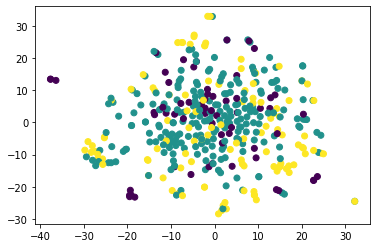

In [51]:
hw_embedded = TSNE(n_components=2, init='pca', random_state =5).fit_transform(germplasm_hw)
plt.scatter(hw_embedded[:, 0], hw_embedded[:, 1], c = fhb.to_numpy())

In [30]:
tr_germplasm.head()

Name,BK_05,BK_08,BK_12,BK_13,BK_14,BOPA1_10012-1239,BOPA1_1007-651,BOPA1_10126-999,BOPA1_10207-1024,BOPA1_10248-954,...,SCRI_RS_97418,SCRI_RS_98248,SCRI_RS_98293,SCRI_RS_98343,SCRI_RS_98443,SCRI_RS_99344,SCRI_RS_994,SCRI_RS_99798,SCRI_RS_9980,SCRI_RS_9991
G49,BB,AA,AA,BB,AA,AA,BB,AA,BB,BB,...,AA,BB,BB,AA,BB,BB,BB,BB,AA,BB
G340,AA,AA,AA,BB,AA,AA,AA,BB,AA,BB,...,AA,AA,BB,AA,AA,AA,BB,BB,AA,AA
G161,AA,AA,AB,AB,AB,AA,AB,AB,AB,BB,...,AB,BB,BB,AA,AA,BB,BB,BB,AA,BB
G175,AA,AA,AA,BB,AA,AA,BB,BB,AA,BB,...,AA,BB,BB,AA,AA,BB,BB,BB,AA,AA
G215,BB,BB,AA,BB,AA,BB,AA,AA,AA,AA,...,AA,BB,BB,AA,BB,BB,AA,AA,AA,AA


In [31]:
genotypes = ['AA', 'AB', 'BB']
representations = [1, 0, -1]

germplasm_one_hot_tr = encode_one_hot(tr_germplasm.copy(deep=True), genotypes)
germplasm_one_hot_test = encode_one_hot(test_germplasm.copy(deep=True), genotypes)
germplasm_one_hot_val = encode_one_hot(vali_germplasm.copy(deep=True), genotypes)

In [32]:
file = open('../Dataset/oh_encoded_tr.pkl', 'wb')
pickle.dump(germplasm_one_hot_tr, file)
file.close()

file = open('../Dataset/oh_encoded_test.pkl', 'wb')
pickle.dump(germplasm_one_hot_test, file)
file.close()

file = open('../Dataset/oh_encoded_val.pkl', 'wb')
pickle.dump(germplasm_one_hot_val, file)
file.close()

In [33]:
file = open('../Dataset/oh_encoded_tr.pkl', 'rb')
germplasm_one_hot_tr = pickle.load(file)
file.close()

file = open('../Dataset/oh_encoded_test.pkl', 'rb')
germplasm_one_hot_test = pickle.load(file)
file.close()

file = open('../Dataset/oh_encoded_val.pkl', 'rb')
germplasm_one_hot_val = pickle.load(file)
file.close()

In [35]:
germplasm_one_hot_tr.shape

(324, 24866, 3)

In [42]:
enc = simple_encoder(genotypes, representations)
germplasm_sm_tr = enc.fit_transform(tr_germplasm.to_numpy())
germplasm_sm_test = enc.fit_transform(test_germplasm.to_numpy())
germplasm_sm_val = enc.fit_transform(vali_germplasm.to_numpy())

In [43]:
germplasm_sm_tr = pd.DataFrame(data= germplasm_sm_tr, columns= tr_germplasm.columns)
germplasm_sm_test = pd.DataFrame(data= germplasm_sm_test, columns= test_germplasm.columns)
germplasm_sm_val = pd.DataFrame(data= germplasm_sm_val, columns= vali_germplasm.columns)

In [44]:
germplasm_sm_tr.to_pickle('../Dataset/sm_encoded_tr.pkl')
germplasm_sm_test.to_pickle('../Dataset/sm_encoded_test.pkl')
germplasm_sm_val.to_pickle('../Dataset/sm_encoded_val.pkl')

In [45]:
germplasm_sm = pd.concat([germplasm_sm_tr, germplasm_sm_test, germplasm_sm_val], axis = 0)
germplasm_sm.head(5)

Name,BK_05,BK_08,BK_12,BK_13,BK_14,BOPA1_10012-1239,BOPA1_1007-651,BOPA1_10126-999,BOPA1_10207-1024,BOPA1_10248-954,...,SCRI_RS_97418,SCRI_RS_98248,SCRI_RS_98293,SCRI_RS_98343,SCRI_RS_98443,SCRI_RS_99344,SCRI_RS_994,SCRI_RS_99798,SCRI_RS_9980,SCRI_RS_9991
0,-1,1,1,-1,1,1,-1,1,-1,-1,...,1,-1,-1,1,-1,-1,-1,-1,1,-1
1,1,1,1,-1,1,1,1,-1,1,-1,...,1,1,-1,1,1,1,-1,-1,1,1
2,1,1,0,0,0,1,0,0,0,-1,...,0,-1,-1,1,1,-1,-1,-1,1,-1
3,1,1,1,-1,1,1,-1,-1,1,-1,...,1,-1,-1,1,1,-1,-1,-1,1,1
4,-1,-1,1,-1,1,-1,1,1,1,1,...,1,-1,-1,1,-1,-1,1,1,1,1


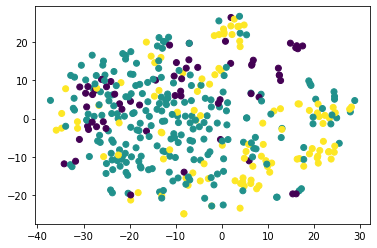

In [50]:
sm_embedded = TSNE(n_components=2, init='pca', random_state =5).fit_transform(germplasm_sm.to_numpy(dtype=np.int))
plt.scatter(sm_embedded[:, 0], sm_embedded[:, 1], c = fhb.to_numpy())